In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp
import matplotlib.pyplot as plt


In [2]:
pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-plot

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import scikitplot as skplt

In [5]:
df_tcc = pd.read_csv('tcc_ceds_music.csv' , na_values= ' ' )

In [6]:
df_tcc.head()


,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [7]:
df_tcc.describe()

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
count,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,...,28372.000000,28372.000000,28372.000000,28372.000000,28372.000000,2.837200e+04,28372.000000,28372.000000,28372.000000,28372.000000
mean,42946.323558,1990.236888,73.028444,0.021112,0.118396,0.120973,0.057387,0.017422,0.017045,0.048681,...,0.028057,0.129389,0.030996,0.533348,0.665249,3.392347e-01,0.080049,0.532864,0.569875,0.425187
std,24749.325492,18.487463,41.829831,0.052370,0.178684,0.172200,0.111923,0.040670,0.041966,0.106095,...,0.058473,0.181143,0.071652,0.173218,0.108434,3.267143e-01,0.211245,0.250972,0.244385,0.264107
min,0.000000,1950.000000,1.000000,0.000291,0.000284,0.000291,0.000289,0.000284,0.000289,0.000284,...,0.000284,0.000284,0.000289,0.005415,0.000000,2.811248e-07,0.000000,0.000000,0.000000,0.014286
25%,20391.250000,1975.000000,42.000000,0.000923,0.001120,0.001170,0.001032,0.000993,0.000923,0.000975,...,0.000975,0.001144,0.000993,0.412975,0.595364,3.423598e-02,0.000000,0.329143,0.380361,0.185714
50%,45405.500000,1991.000000,63.000000,0.001462,0.002506,0.006579,0.001949,0.001595,0.001504,0.001754,...,0.001595,0.005263,0.001754,0.538612,0.679050,2.259028e-01,0.000085,0.539365,0.580567,0.414286
75%,64090.500000,2007.000000,93.000000,0.004049,0.192608,0.197793,0.065842,0.010002,0.004785,0.042301,...,0.026622,0.235113,0.032622,0.656666,0.749026,6.325298e-01,0.009335,0.738252,0.772766,0.642857
max,82451.000000,2019.000000,199.000000,0.647706,0.981781,0.962105,0.973684,0.497463,0.545303,0.940789,...,0.594459,0.981424,0.958810,0.993502,1.000000,1.000000e+00,0.996964,1.000000,1.000000,1.000000


In [8]:
df_tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28372 entries, 0 to 28371
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                28372 non-null  int64  
 1   artist_name               28372 non-null  object 
 2   track_name                28372 non-null  object 
 3   release_date              28372 non-null  int64  
 4   genre                     28372 non-null  object 
 5   lyrics                    28372 non-null  object 
 6   len                       28372 non-null  int64  
 7   dating                    28372 non-null  float64
 8   violence                  28372 non-null  float64
 9   world/life                28372 non-null  float64
 10  night/time                28372 non-null  float64
 11  shake the audience        28372 non-null  float64
 12  family/gospel             28372 non-null  float64
 13  romantic                  28372 non-null  float64
 14  commun

In [9]:
df_tcc.duplicated().any()
# NO duplisated 

False

In [10]:
df_tcc.isna().sum()
#NO NaN in tcc dataframe

Unnamed: 0                  0
artist_name                 0
track_name                  0
release_date                0
genre                       0
lyrics                      0
len                         0
dating                      0
violence                    0
world/life                  0
night/time                  0
shake the audience          0
family/gospel               0
romantic                    0
communication               0
obscene                     0
music                       0
movement/places             0
light/visual perceptions    0
family/spiritual            0
like/girls                  0
sadness                     0
feelings                    0
danceability                0
loudness                    0
acousticness                0
instrumentalness            0
valence                     0
energy                      0
topic                       0
age                         0
dtype: int64

In [11]:
for i in range(len(df_tcc['artist_name'].unique())):
    print(df_tcc[['track_name' , 'age']][df_tcc['artist_name'] == df_tcc['artist_name'].unique()[i]])
    
# list par artist name 

                    track_name       age
0         mohabbat bhi jhoothi  1.000000
24  hum tujhse mohabbat kar ke  0.971429
33    raat andheri door savera  0.957143
                               track_name       age
1                               i believe  1.000000
12                         necessary evil  0.985714
42                      after you've gone  0.942857
59                                jezebel  0.928571
100    remember me (the girl in the wood)  0.914286
156                             mona lisa  0.885714
161                rose, rose, i love you  0.885714
182                             high noon  0.885714
207                   jealousy (jalousie)  0.885714
214                               granada  0.885714
215                   your cheatin' heart  0.885714
218                      that's my desire  0.885714
513                            wanted man  0.842857
23436          i heard the angels singing  0.914286
23437      i feel like my time ain't long  0.914286
2346

In [12]:
df_tcc.genre

0            pop
1            pop
2            pop
3            pop
4            pop
          ...   
28367    hip hop
28368    hip hop
28369    hip hop
28370    hip hop
28371    hip hop
Name: genre, Length: 28372, dtype: object

In [13]:
df_tcc["genre"].unique()

array(['pop', 'country', 'blues', 'jazz', 'reggae', 'rock', 'hip hop'],
      dtype=object)

<AxesSubplot:ylabel='genre'>

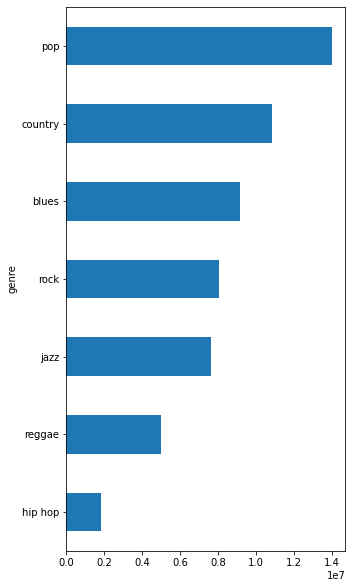

In [14]:

df_tcc.groupby('genre')['release_date'].sum().sort_values(ascending=True).plot(kind='barh',figsize=(5,10))

In [15]:
artists = df_tcc["artist_name"].value_counts()[:20].sort_values(ascending = True)

In [16]:
artists

ray price           66
the beatles         66
merle haggard       68
bob dylan           69
aretha franklin     71
marty robbins       74
conway twitty       74
phish               75
eric clapton        78
the beach boys      81
nina simone         82
george strait       92
waylon jennings     95
dolly parton        96
elvis presley       97
george jones       107
willie nelson      131
dean martin        146
ella fitzgerald    188
johnny cash        190
Name: artist_name, dtype: int64

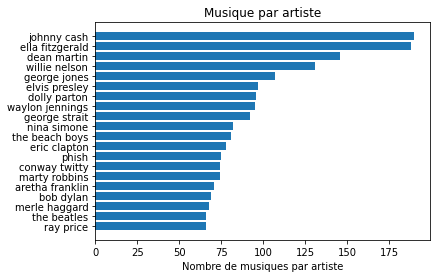

In [17]:
plt.barh(artists.index, artists)
plt.xlabel("Nombre de musiques par artiste")
plt.title("Musique par artiste")
plt.show()

<AxesSubplot:xlabel='genre', ylabel='age'>

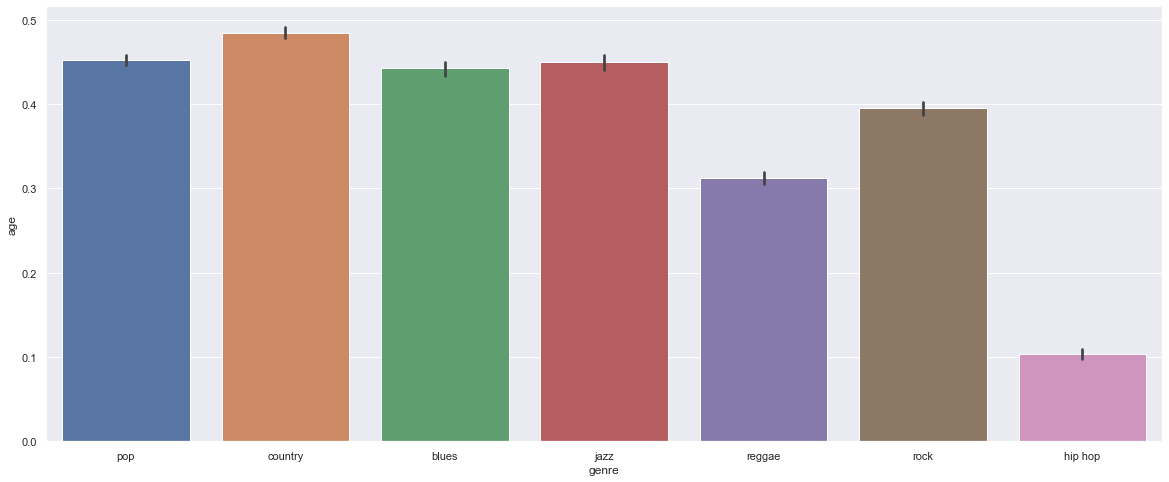

In [18]:
sns.set(rc = {'figure.figsize':(20,8)})
sns.barplot(x='genre',y='age',data=df_tcc)

In [19]:
topics = df_tcc["topic"].value_counts()[:20].sort_values(ascending = True)

In [20]:
topics

feelings       612
romantic      1524
night/time    1825
music         2303
obscene       4882
world/life    5420
violence      5710
sadness       6096
Name: topic, dtype: int64

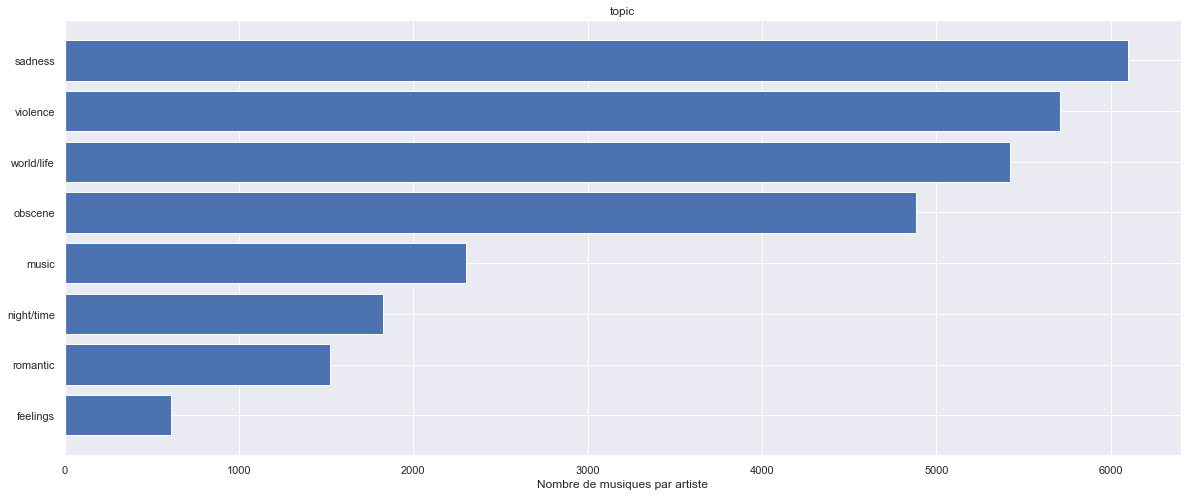

In [23]:
plt.barh(topics.index, topics)
plt.xlabel("Nombre de musiques par artiste")
plt.title("topic")
plt.show()

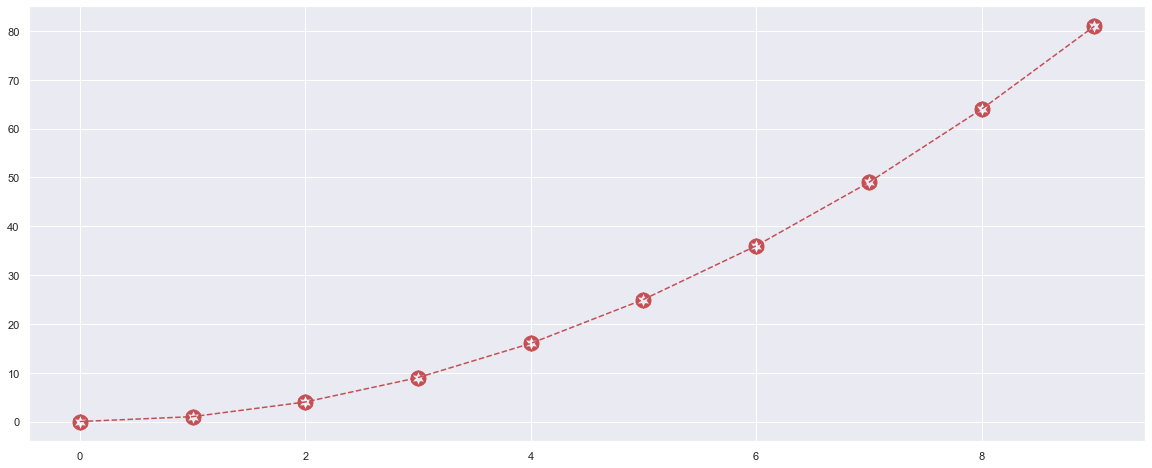

In [24]:
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import numpy as np


star = mpath.Path.unit_regular_star(6)
circle = mpath.Path.unit_circle()
# concatenate the circle with an internal cutout of the star
verts = np.concatenate([circle.vertices, star.vertices[::-1, ...]])
codes = np.concatenate([circle.codes, star.codes])
cut_star = mpath.Path(verts, codes)


plt.plot(np.arange(10)**2, '--r', marker=cut_star, markersize=15)

plt.show()

In [25]:
#max the highest age with artist name
dftcc = df_tcc["artist_name"].unique()
toll_max = df_tcc.groupby(['artist_name'])['age'].max()
toll_max

artist_name
"weird al" yankovic    0.528571
$uicideboy$            0.014286
'til tuesday           0.557143
(hed) p.e.             0.328571
*nsync                 0.328571
                         ...   
ødyssee                0.014286
željko bebek           0.442857
дэфолиант              0.057143
張露                     0.885714
彭家麗                    0.414286
Name: age, Length: 5426, dtype: float64

In [26]:
df_tcc.artist_name

0                      mukesh
1               frankie laine
2                 johnnie ray
3                 pérez prado
4        giorgos papadopoulos
                 ...         
28367                 mack 10
28368                  m.o.p.
28369                    nine
28370              will smith
28371                   jeezy
Name: artist_name, Length: 28372, dtype: object

In [27]:
#min 
dftcc = df_tcc["artist_name"].unique()
toll_min = df_tcc.groupby(['artist_name'])['age'].min()
toll_min

artist_name
"weird al" yankovic    0.300000
$uicideboy$            0.014286
'til tuesday           0.557143
(hed) p.e.             0.214286
*nsync                 0.271429
                         ...   
ødyssee                0.014286
željko bebek           0.442857
дэфолиант              0.057143
張露                     0.885714
彭家麗                    0.414286
Name: age, Length: 5426, dtype: float64

<AxesSubplot:xlabel='release_date', ylabel='genre'>

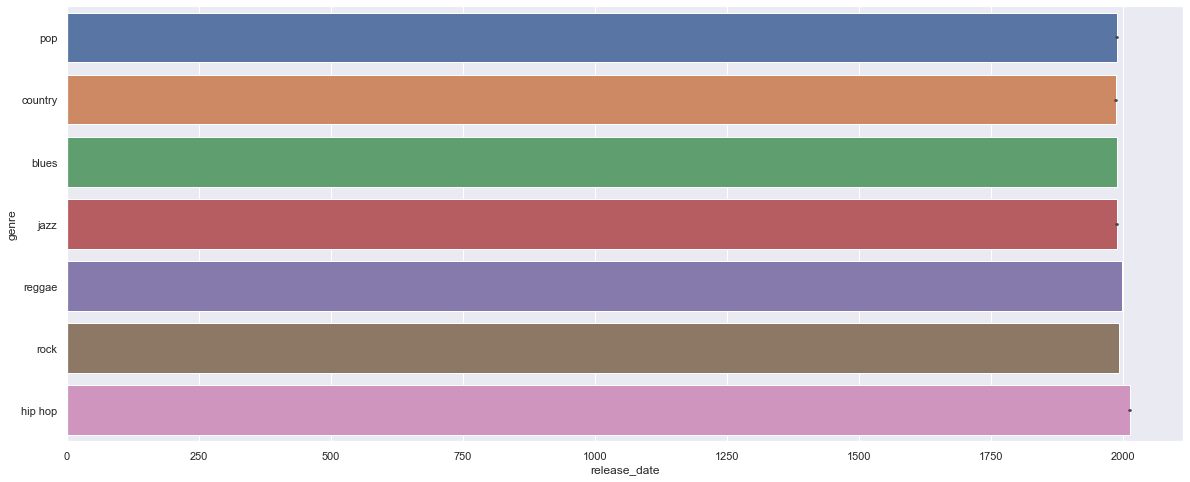

In [28]:
sns.barplot(data=df_tcc,x="release_date",y="genre") 

In [29]:
# the highest genre
dfgenre = df_tcc["release_date"].unique()

casesToll = df_tcc.groupby(['release_date'])['genre'].sum()

casesToll.sort_values(ascending = False)

release_date
2015    poppoppoppoppoppoppoppoppoppoppoppoppoppoppopp...
1968    poppoppoppoppoppoppoppoppoppoppoppoppoppoppopp...
2013    poppoppoppoppoppoppoppoppoppoppoppoppoppoppopp...
1982    poppoppoppoppoppoppoppoppoppoppoppoppoppoppopp...
1991    poppoppoppoppoppoppoppoppoppoppoppoppoppoppopp...
                              ...                        
1952    poppoppoppoppoppoppoppoppoppoppopcountrycountr...
1953    poppoppoppoppoppoppoppoppoppoppopcountrycountr...
1950    poppoppoppoppoppoppoppoppoppopcountrycountryco...
1955    poppoppoppoppoppoppoppoppoppopcountrycountryco...
1951    poppoppoppoppoppoppoppopcountrycountrycountryc...
Name: genre, Length: 70, dtype: object

In [ ]:
#key_encoder = LabelEncoder()
#df_music["format"] = key_encoder.fit_transform(df_music["format"])
#df_music["metric"] = key_encoder.fit_transform(df_music["metric"])
#df_music.head()

In [32]:
df_tcc.age

0        1.000000
1        1.000000
2        1.000000
3        1.000000
4        1.000000
           ...   
28367    0.014286
28368    0.014286
28369    0.014286
28370    0.014286
28371    0.014286
Name: age, Length: 28372, dtype: float64

In [34]:
numeric = df_tcc.drop(["artist_name", "track_name", "genre", "lyrics", "topic"], axis = 1)

In [35]:
numeric

,Unnamed: 0,release_date,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,...,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,age
0,0,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,...,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,1.000000
1,4,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,...,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,1.000000
2,6,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,...,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,1.000000
3,10,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,...,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,1.000000
4,12,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,...,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28367,82447,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.065664,0.001350,0.889527,0.759711,0.062549,0.000000,0.751649,0.695686,0.014286
28368,82448,2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,0.001284,0.066324,...,0.040811,0.001284,0.001284,0.662082,0.789580,0.004607,0.000002,0.922712,0.797791,0.014286
28369,82449,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,0.001504,0.035401,...,0.001504,0.001504,0.001504,0.663165,0.726970,0.104417,0.000001,0.838211,0.767761,0.014286
28370,82450,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,0.001196,0.001196,...,0.070867,0.001196,0.001196,0.883028,0.786888,0.007027,0.000503,0.508450,0.885882,0.014286


IndexError: index 12 is out of bounds for axis 0 with size 12

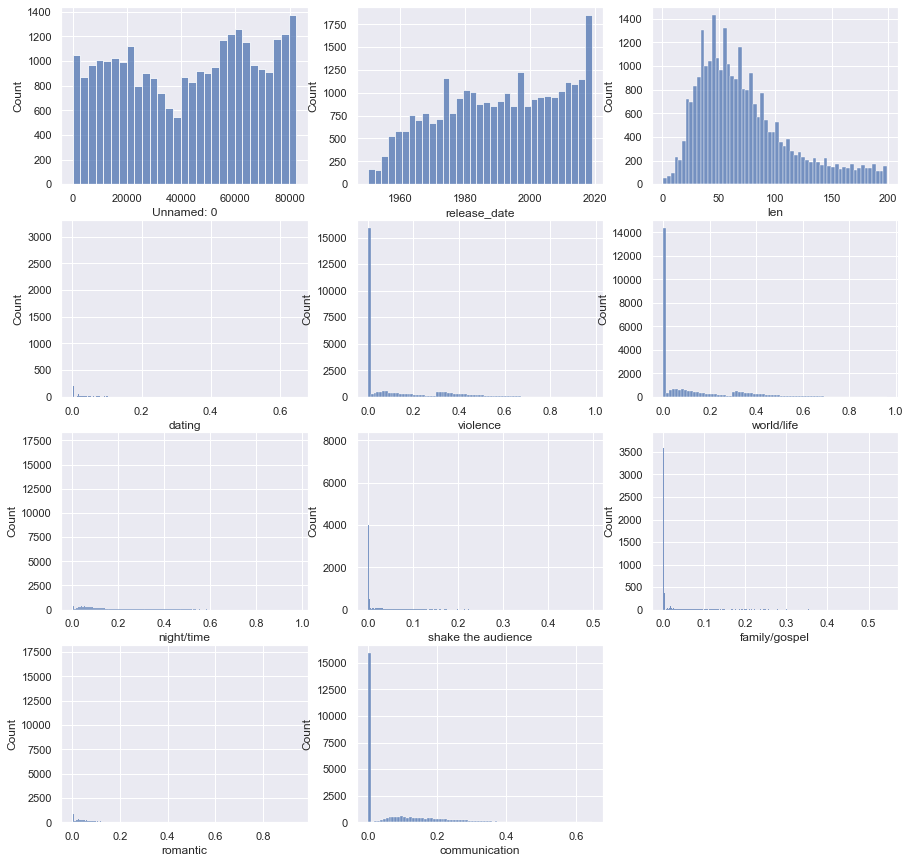

In [53]:
fig, axs = plt.subplots(ncols = 3, nrows = 4, figsize = (15, 15))
fig.delaxes(axs[3][2])
index = 0

axs = axs.flatten()
for k, v in numeric.items():
    sns.histplot(v, ax = axs[index])
    index += 1
plt.tight_layout(pad = 0.4, w_pad = 0.5, h_pad = 5.0)

<AxesSubplot:xlabel='romantic', ylabel='violence'>

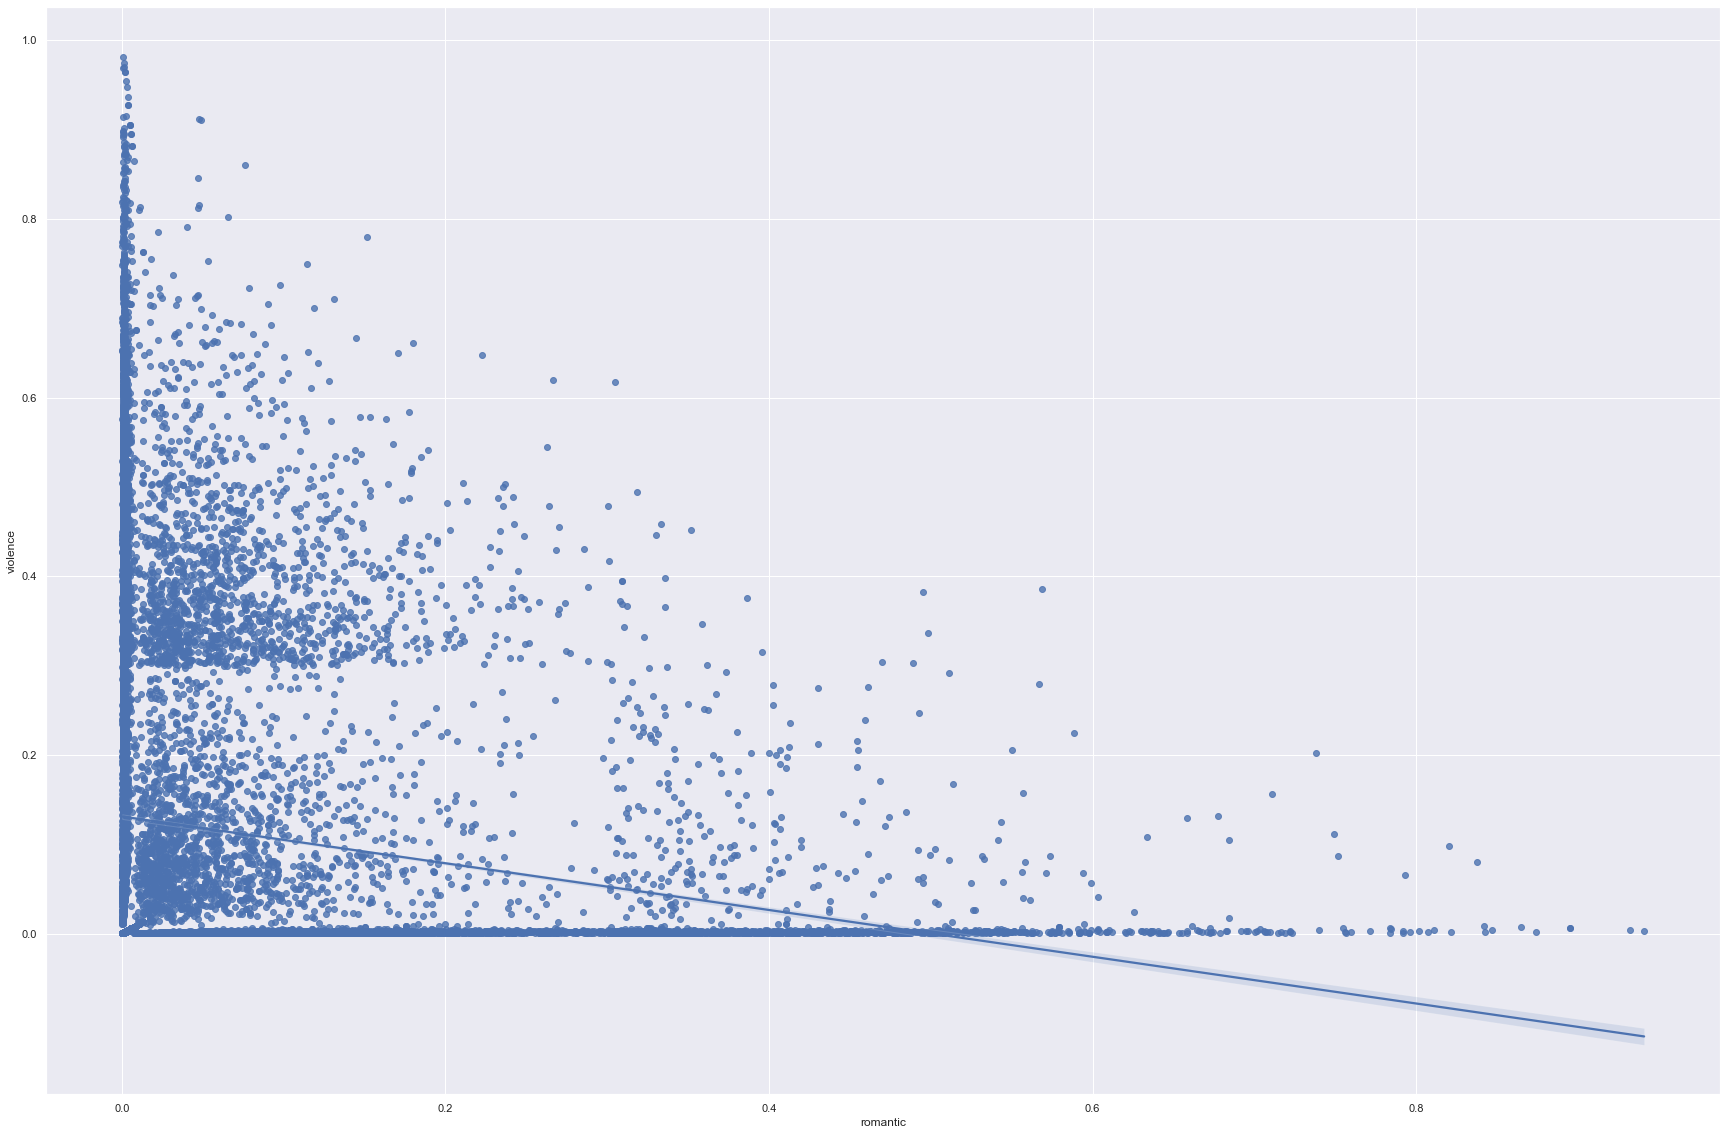

In [41]:
#Correlation between songs romantic and violence
plt.figure(figsize= (30 , 20))
sns.regplot(x = df_tcc['romantic'] , y = df_tcc['violence'])

C:\Users\patel\AppData\Local\Temp\ipykernel_22544\394734173.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<AxesSubplot:>

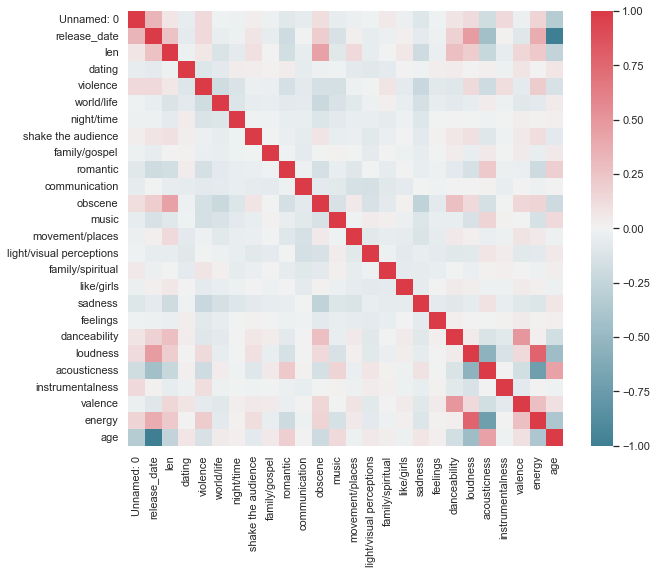

In [46]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = numeric.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [ ]:
#data[colonne].unique()